In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [5]:
df = pd.read_excel("uybor.xlsx")
df.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [7]:
df.describe()

,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


In [8]:
df.isna().sum()

address       0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

In [9]:
df["rooms"].value_counts()

rooms
2     2706
3     2297
4     1117
1      984
5      255
6       42
7       11
10       5
8        4
Name: count, dtype: int64

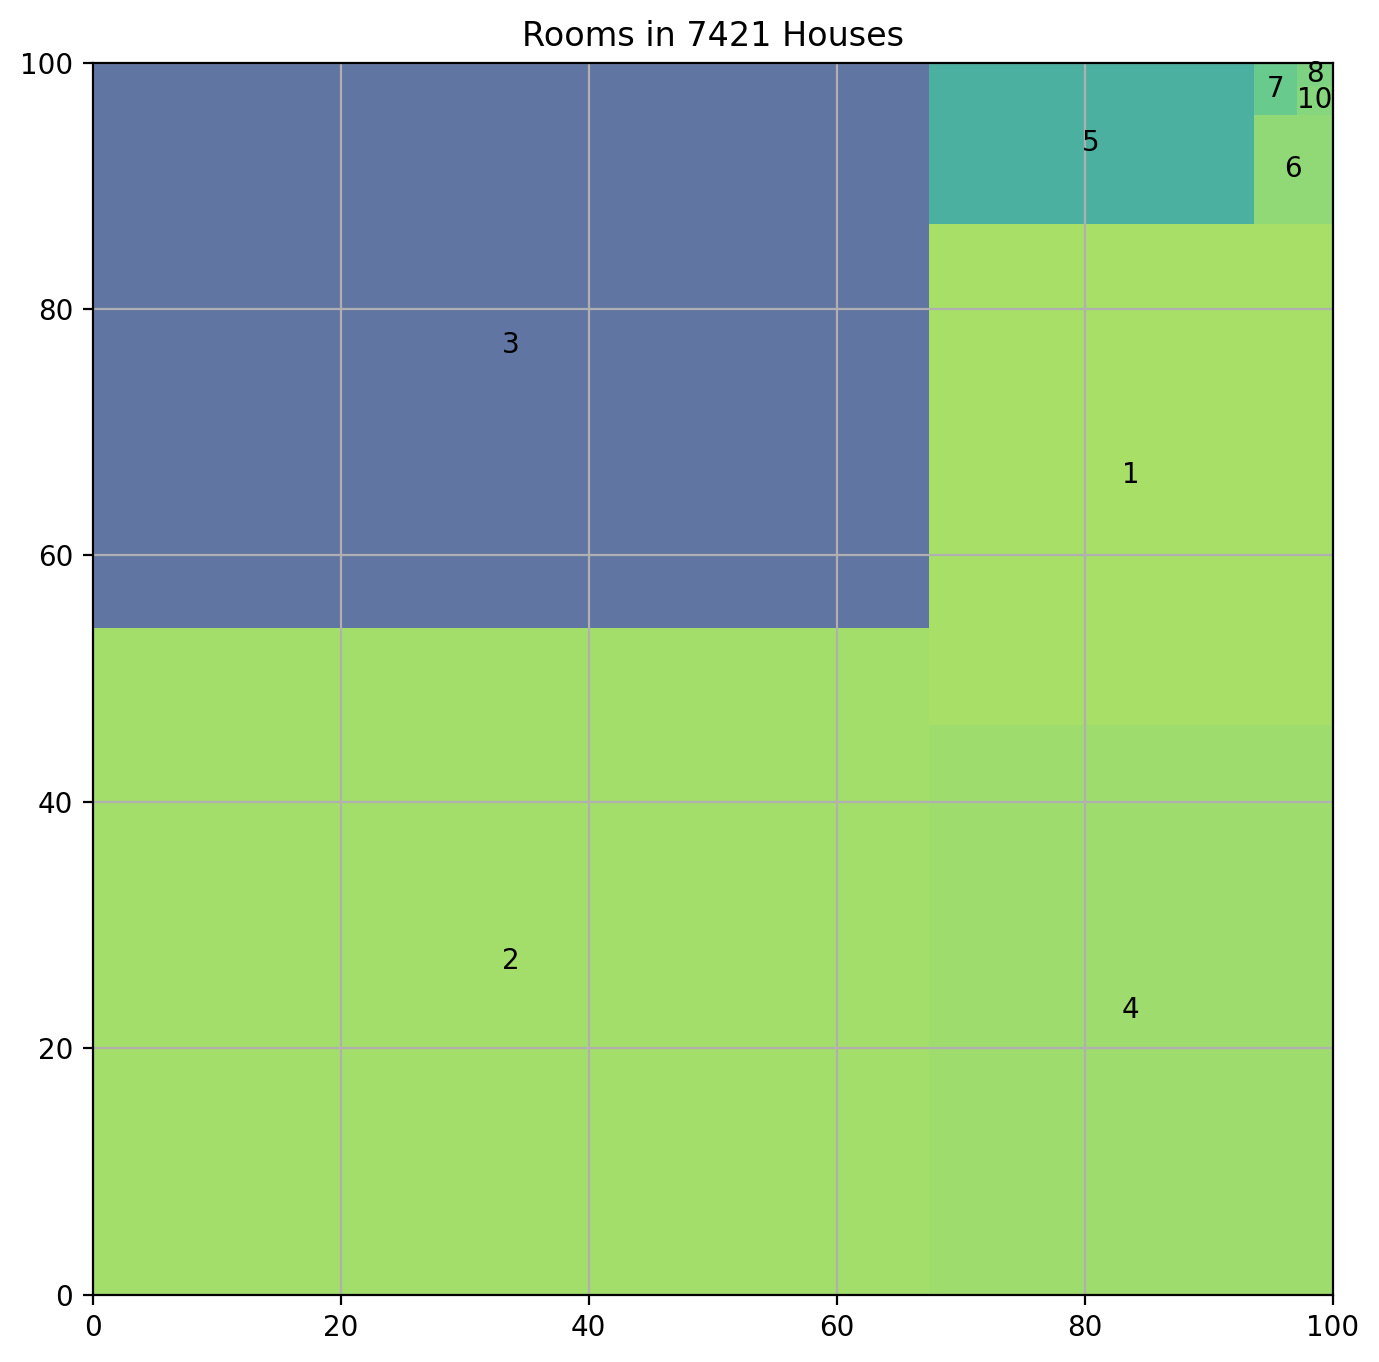

In [10]:
plt.figure(figsize=(8, 8), dpi=200)
squarify.plot(sizes=df["rooms"].value_counts(), label=df["rooms"].value_counts().index, alpha=.8)
plt.title("Rooms in 7421 Houses")
plt.grid(True)
plt.show()

C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\1417197017.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="rooms", palette="Reds_d")


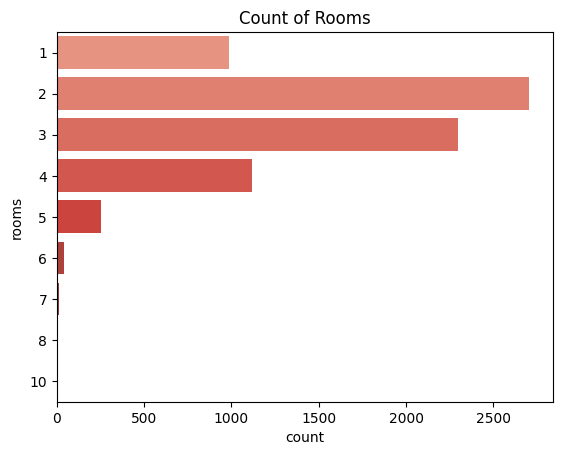

In [11]:
sns.countplot(data=df, y="rooms", palette="Reds_d")
plt.title("Count of Rooms")
plt.show()

In [12]:
df["level"].value_counts()

level
4     1521
2     1389
3     1299
1     1148
5      870
6      314
7      305
9      255
8      243
10      21
12      19
11      15
16       9
13       6
15       2
18       2
14       2
19       1
Name: count, dtype: int64

C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\279823872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="level", palette="Greens_d", order=df["level"].value_counts().index)


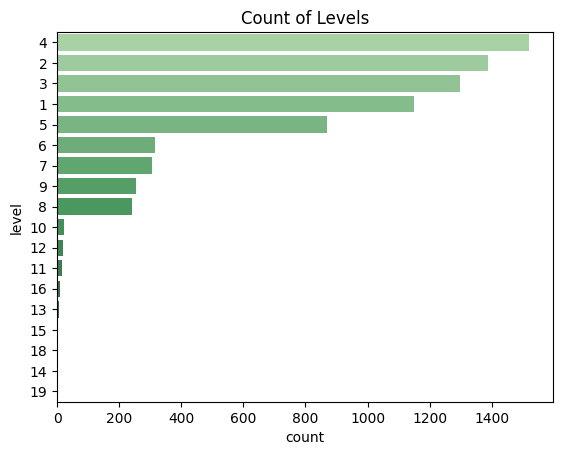

In [13]:
sns.countplot(data=df, y="level", palette="Greens_d", order=df["level"].value_counts().index)
plt.title("Count of Levels")
plt.show()

In [14]:
df["max_levels"].value_counts().sort_values()

max_levels
20       1
22       1
14       1
19       2
23       4
17       5
18       5
25       5
13       8
1       14
11      16
16      52
10      59
2       79
6      112
3      128
12     136
7      223
8      306
5     1606
9     1808
4     2850
Name: count, dtype: int64

C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\813430298.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="max_levels", palette="Blues_d", order=df["max_levels"].value_counts().index)


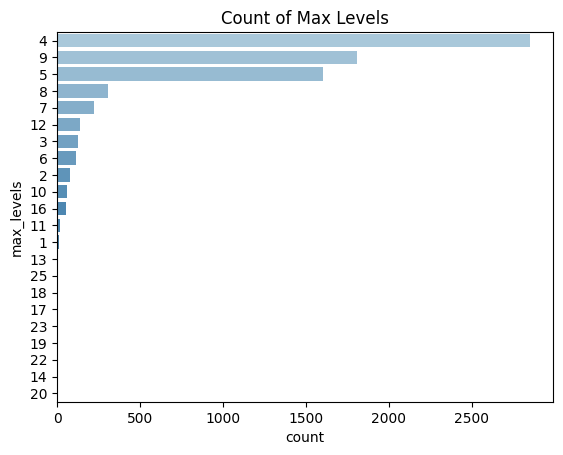

In [15]:
sns.countplot(data=df, y="max_levels", palette="Blues_d", order=df["max_levels"].value_counts().index)
plt.title("Count of Max Levels")
plt.show()

In [16]:
df["district"].value_counts().sort_values()

district
Bektemir            8
Yangihayot         14
Sergeli           159
Olmzor            264
Shayhontohur      371
Yashnobod         459
Yakkasaroy        647
Mirobod           767
Uchtepa           870
Yunusobod         873
Mirzo Ulugbek    1360
Chilonzor        1629
Name: count, dtype: int64

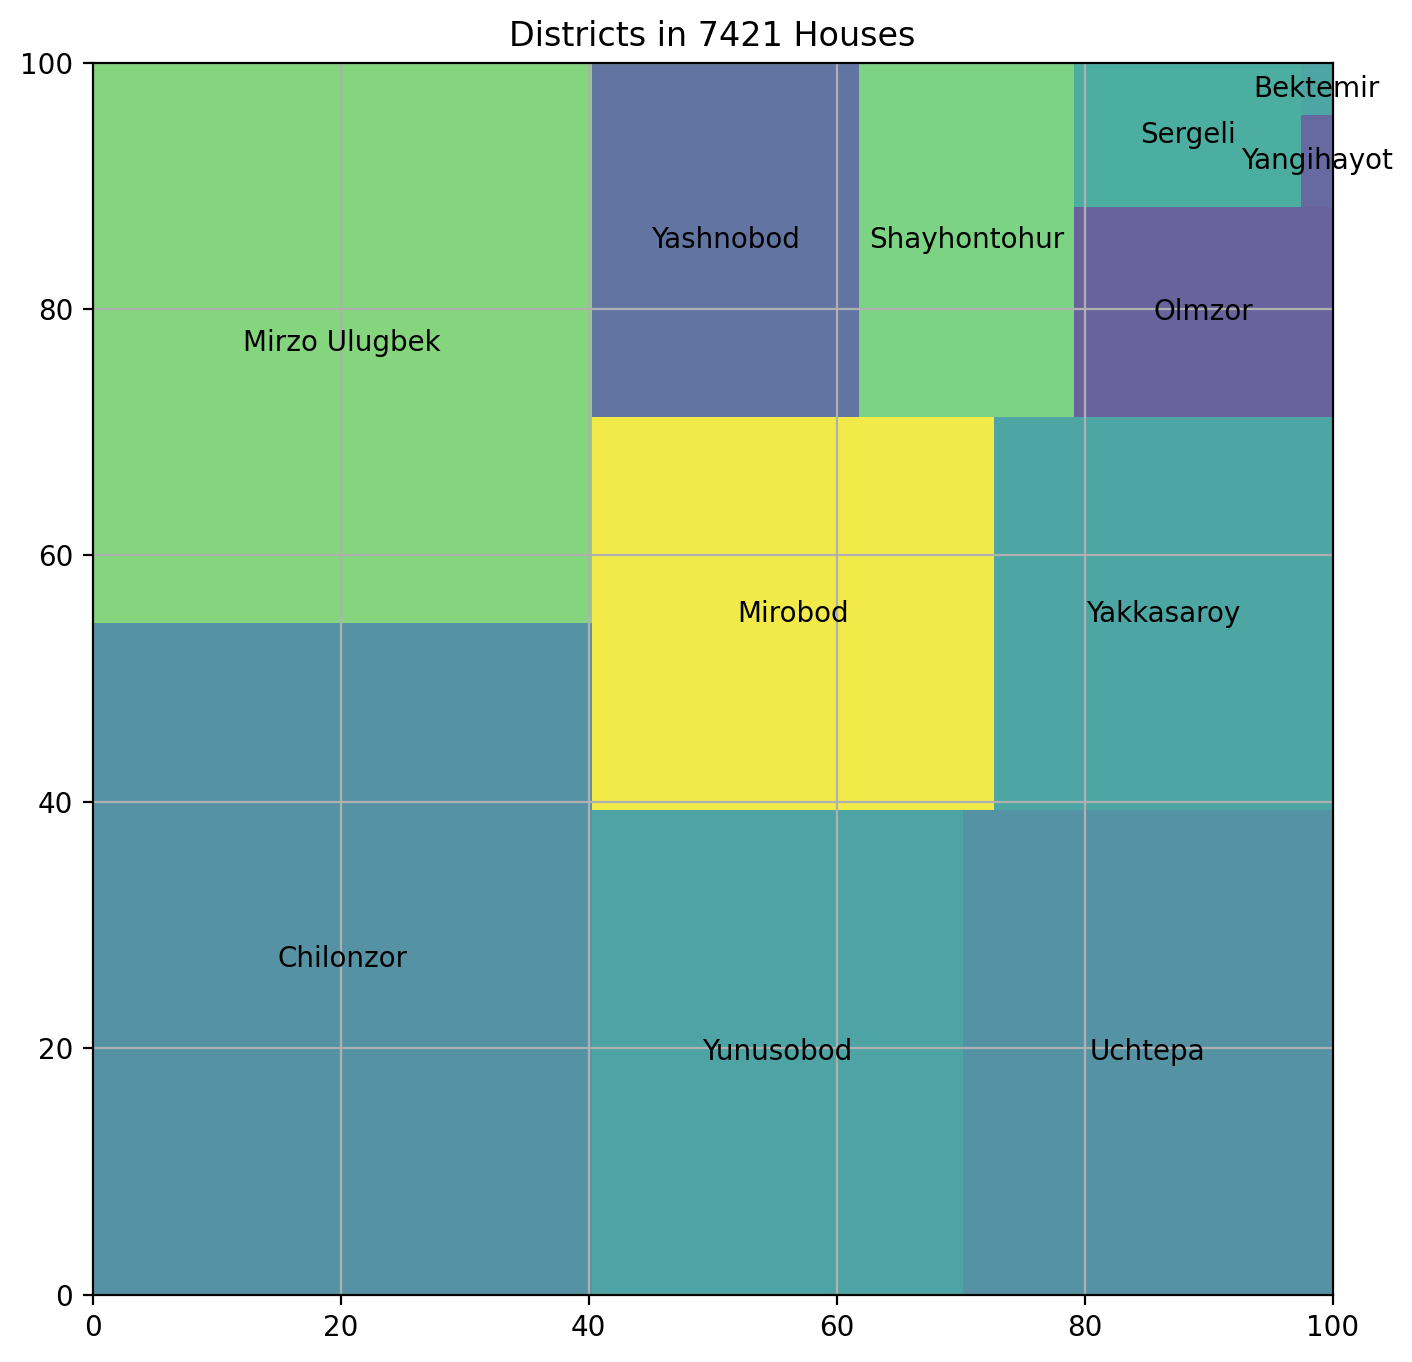

In [17]:
plt.figure(figsize=(8, 8), dpi=200)
squarify.plot(sizes=df["district"].value_counts(), label=df["district"].value_counts().index, alpha=.8)
plt.title("Districts in 7421 Houses")
plt.grid(True)
plt.show()

C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\2179601460.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="district", palette="viridis", order=df["district"].value_counts().sort_values(ascending=False).index)


<Axes: xlabel='count', ylabel='district'>

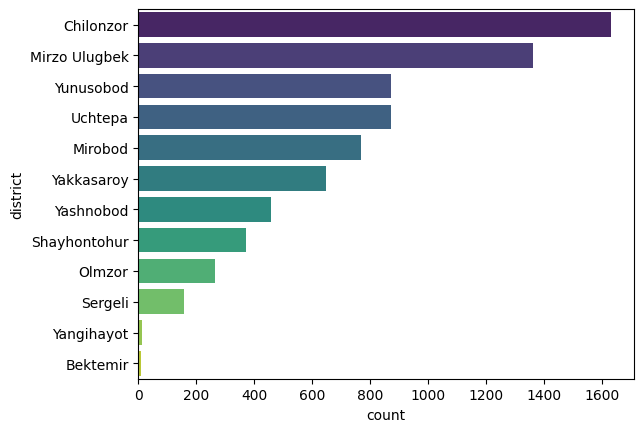

In [18]:
sns.countplot(data=df, y="district", palette="viridis", order=df["district"].value_counts().sort_values(ascending=False).index)

<Axes: xlabel='size', ylabel='Count'>

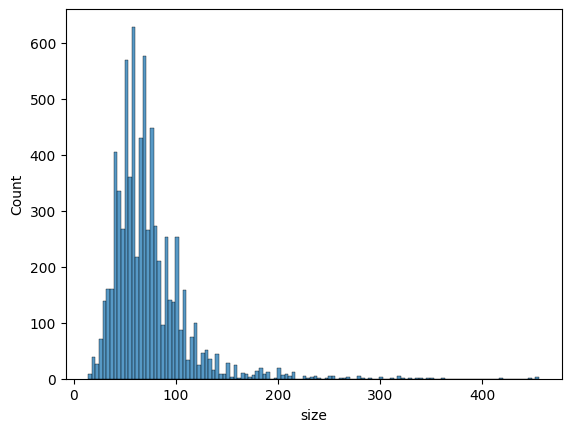

In [19]:
sns.histplot(data=df, x="size")

<Axes: xlabel='price', ylabel='Count'>

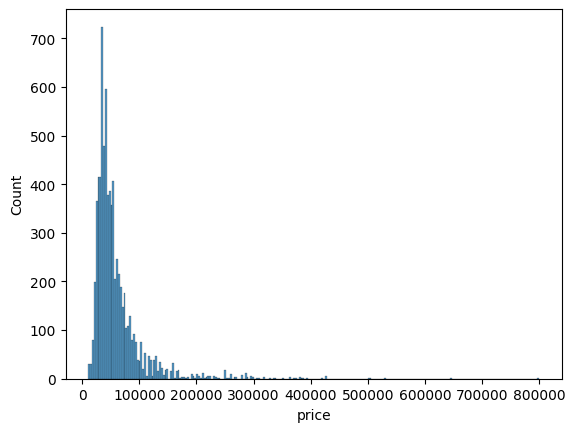

In [20]:
sns.histplot(data=df, x="price")

<Axes: ylabel='price'>

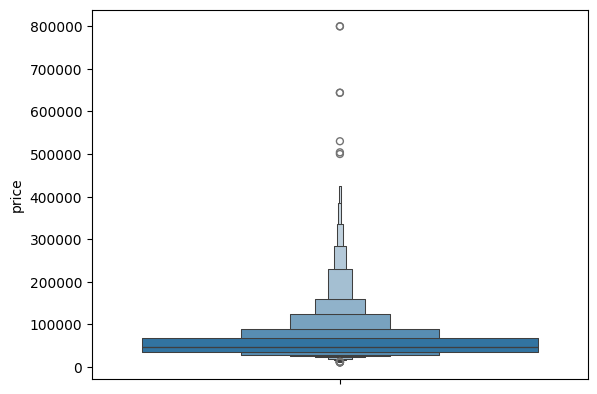

In [21]:
sns.boxenplot(data=df, y="price")

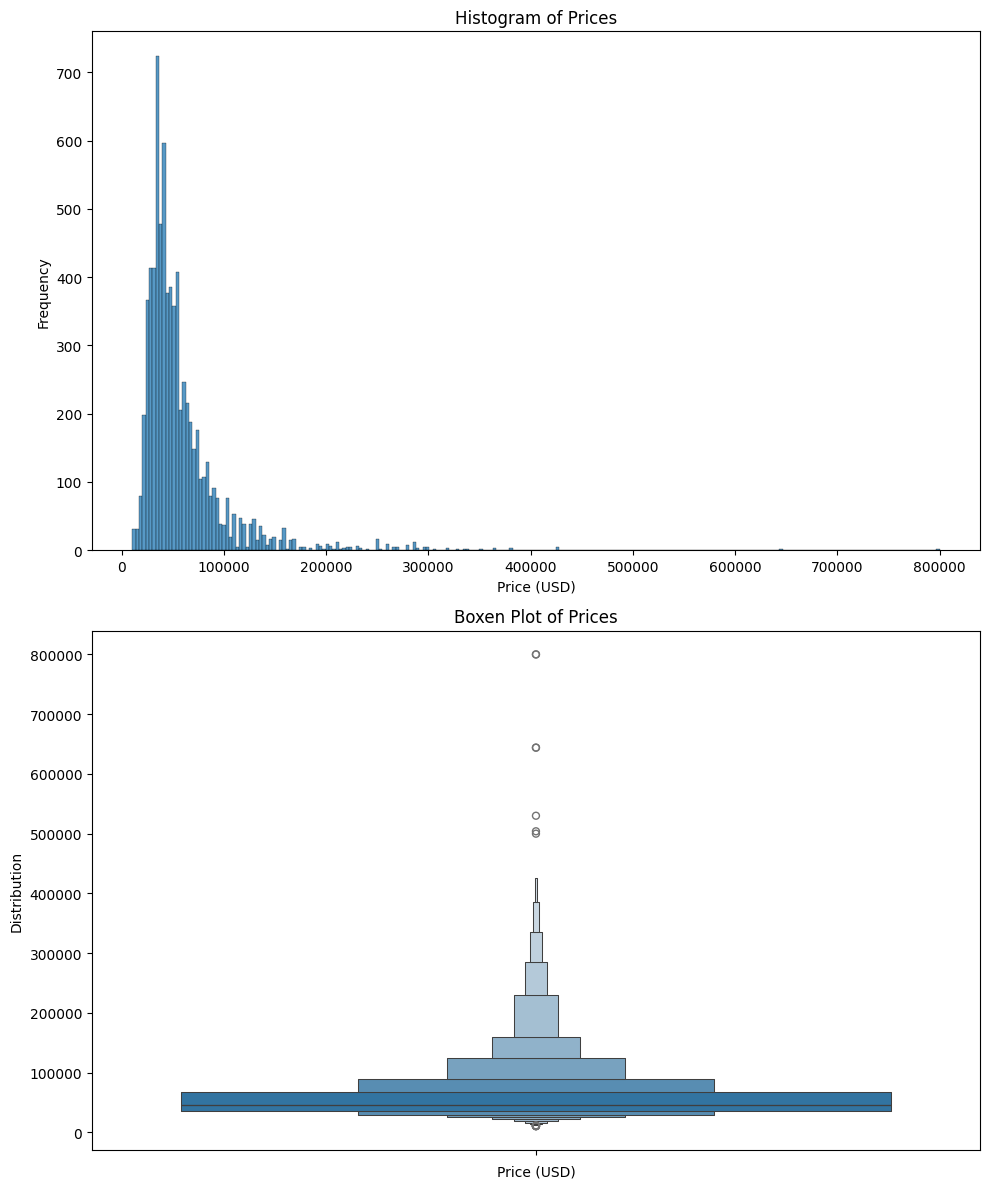

In [22]:
# Creating a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plotting the histogram in the first subplot
sns.histplot(data=df, x="price", ax=axs[0])
axs[0].set_title('Histogram of Prices')
axs[0].set_xlabel('Price (USD)')
axs[0].set_ylabel('Frequency')

# Plotting the boxen plot in the second subplot
sns.boxenplot(data=df, y="price", ax=axs[1])
axs[1].set_title('Boxen Plot of Prices')
axs[1].set_xlabel('Price (USD)')
axs[1].set_ylabel('Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [23]:
df_new = pd.get_dummies(df.drop("address",axis=1))
df_new.head()

,rooms,size,level,max_levels,price,lat,lng,district_Bektemir,district_Chilonzor,district_Mirobod,district_Mirzo Ulugbek,district_Olmzor,district_Sergeli,district_Shayhontohur,district_Uchtepa,district_Yakkasaroy,district_Yangihayot,district_Yashnobod,district_Yunusobod
0,3,57.0,4,4,52000,41.371471,69.281049,False,False,False,False,False,False,False,False,False,False,False,True
1,2,52.0,4,5,56000,41.291115,69.261104,False,False,False,False,False,False,False,False,True,False,False,False
2,2,42.0,4,4,37000,41.280784,69.223683,False,True,False,False,False,False,False,False,False,False,False,False
3,3,65.0,1,4,49500,41.290163,69.196862,False,True,False,False,False,False,False,False,False,False,False,False
4,3,70.0,3,5,55000,41.300156,69.210831,False,True,False,False,False,False,False,False,False,False,False,False


C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\970196258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_df,y=corr_df.index, palette="Greens")


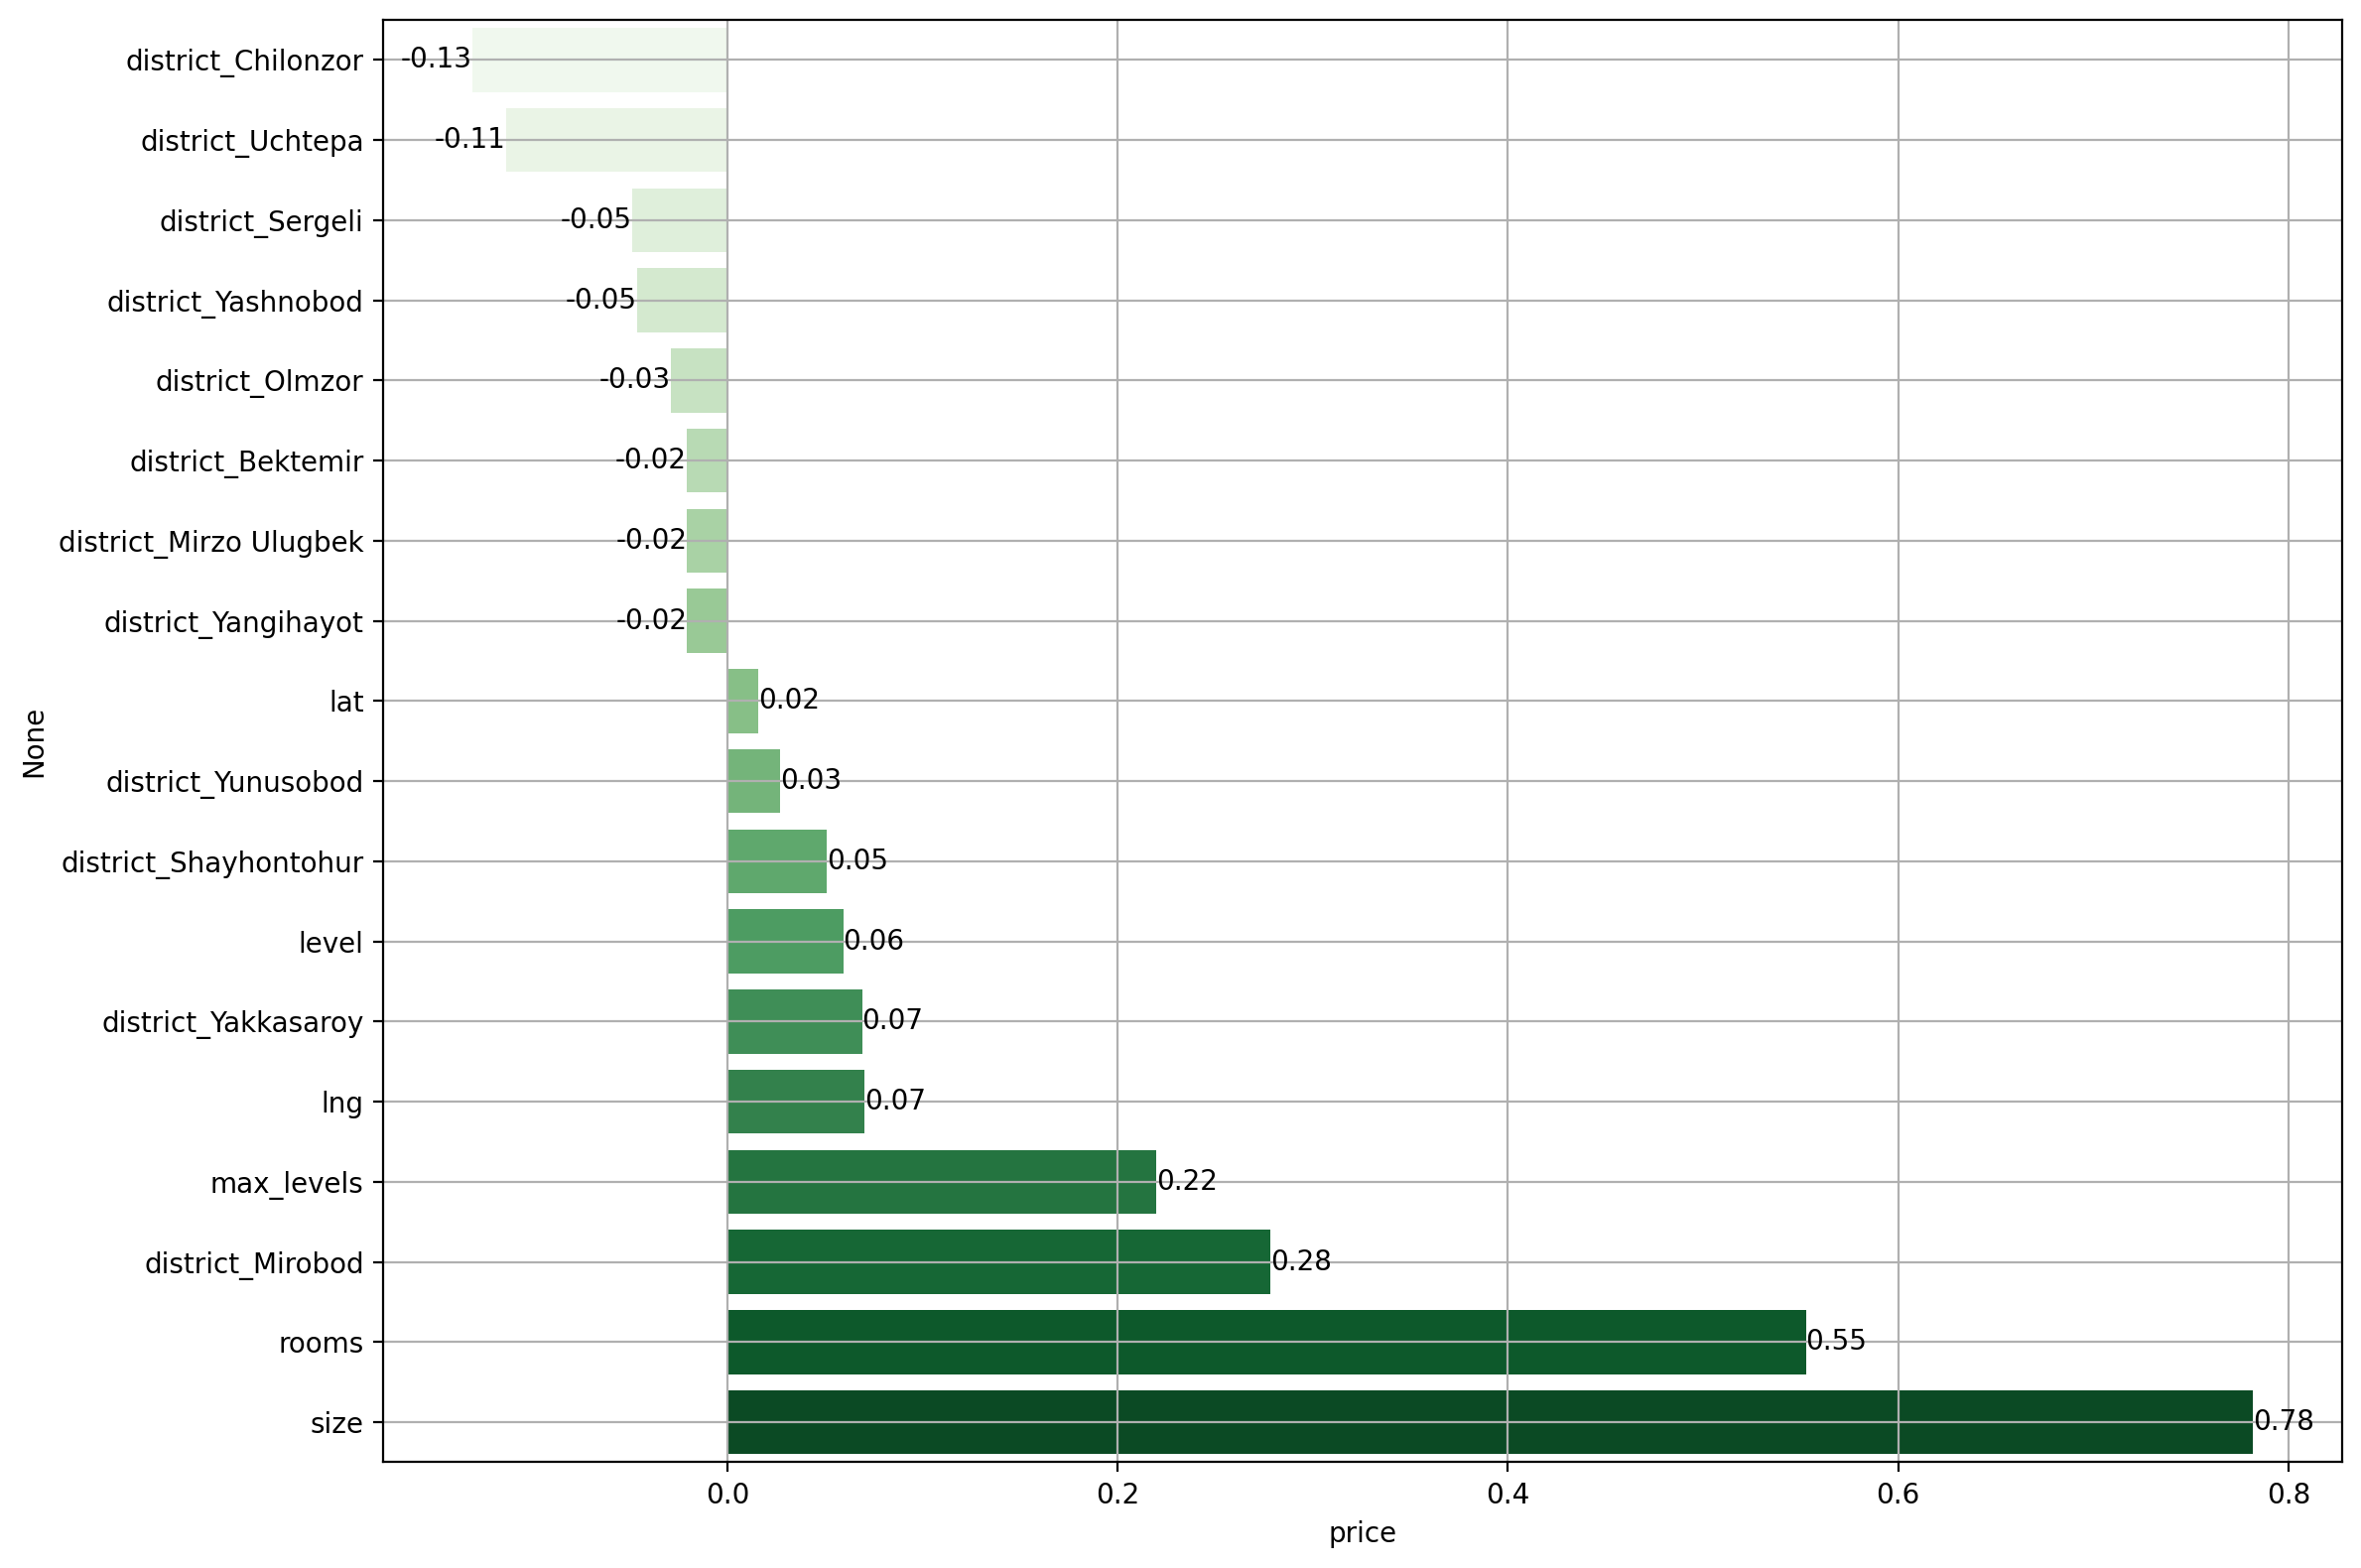

In [24]:
corr_df = df_new.corr()["price"].sort_values()
corr_df = corr_df.drop("price",axis=0)
plt.figure(figsize=(12,8),dpi=200)
ax = sns.barplot(x=corr_df,y=corr_df.index, palette="Greens")
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f", label_type="edge")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
X = df_new.drop("price",axis=1)
y = df_new["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
def run_model(model):
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,y_pred)
    MAE_perc = mean_absolute_percentage_error(y_test,y_pred)
    
    results = pd.DataFrame({
        "Model":[model.__class__.__name__],
        "MAE":[MAE],
        "MSE":[MSE],
        "RMSE":[RMSE],
        "R2":[R2],
        "MAE_percentage":[MAE_perc]
    })
    return results

In [27]:
model1 = run_model(SVR())
model2 = run_model(LinearRegression())
model3 = run_model(KNeighborsRegressor())
model4 = run_model(DecisionTreeRegressor())
model5 = run_model(RandomForestRegressor())
model6 = run_model(AdaBoostRegressor())
model7 = run_model(GradientBoostingRegressor())

In [28]:
models = [model1,model2,model3,model4,model5,model6,model7]
combined_df = model1

for model_df in models[1:]:
    combined_df = pd.concat([combined_df, model_df], ignore_index=True)

combined_df = combined_df.sort_values(by="RMSE")
combined_df

,Model,MAE,MSE,RMSE,R2,MAE_percentage
4,RandomForestRegressor,8800.784948,3.174336e+08,17816.666979,0.825904,0.144164
6,GradientBoostingRegressor,10852.323747,3.972704e+08,19931.642468,0.782117,0.180677
2,KNeighborsRegressor,11081.630168,4.599399e+08,21446.208652,0.747746,0.176836
1,LinearRegression,13549.787753,5.584615e+08,23631.789362,0.693712,0.231328
3,DecisionTreeRegressor,11131.931812,5.838931e+08,24163.879158,0.679764,0.174094
5,AdaBoostRegressor,19914.562572,8.446218e+08,29062.378227,0.536768,0.421271
0,SVR,24273.285201,1.980296e+09,44500.512480,-0.086091,0.376952


C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\319311878.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_df, x=metric, y="Model", palette=palette, ax=ax)
C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\319311878.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_df, x=metric, y="Model", palette=palette, ax=ax)
C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\319311878.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_df, x=metric, y="Model", palette=palette, ax=ax)
C:\Users\faraf\AppD

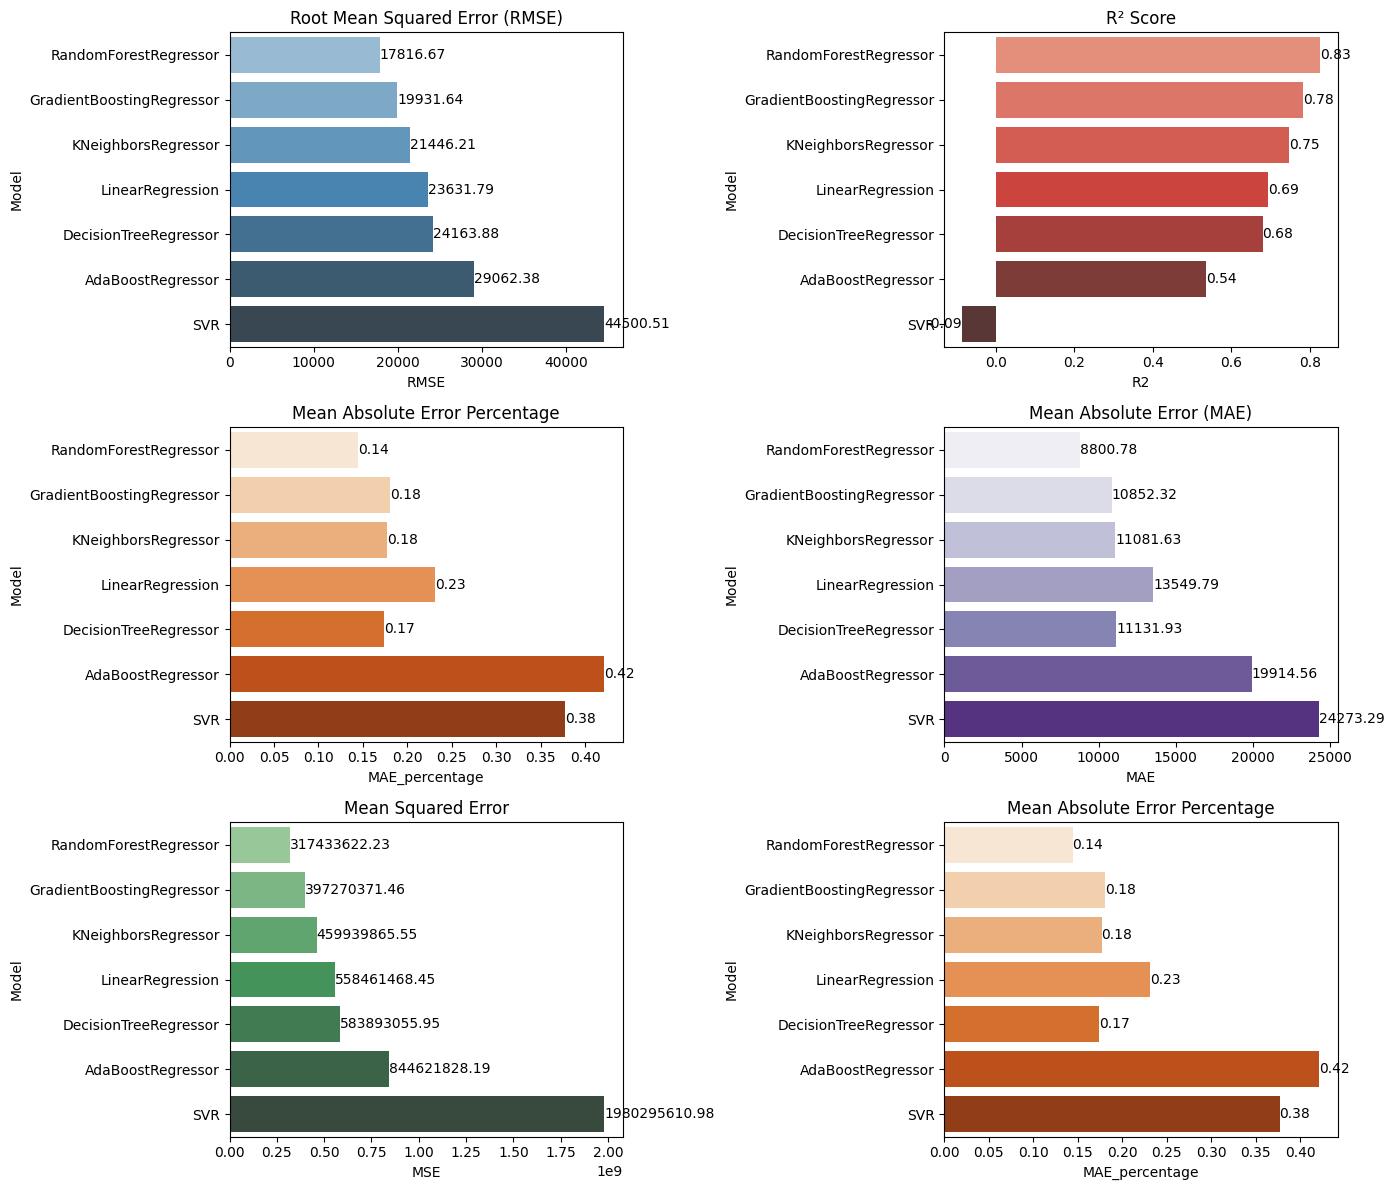

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics and their properties
metrics = [
    ("RMSE", "Blues_d", "Root Mean Squared Error (RMSE)"),
    ("R2", "Reds_d", "R² Score"),
    ("MAE_percentage", "Oranges", "Mean Absolute Error Percentage"),
    ("MAE", "Purples", "Mean Absolute Error (MAE)"),
    ("MSE", "Greens_d", "Mean Squared Error"),
    ("MAE_percentage", "Oranges", "Mean Absolute Error Percentage")
]

plt.figure(figsize=(14, 12))

# Loop through metrics to create subplots
for idx, (metric, palette, title) in enumerate(metrics, 1):
    ax = plt.subplot(3, 2, idx)
    sns.barplot(data=combined_df, x=metric, y="Model", palette=palette, ax=ax)
    plt.title(title)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge")

plt.tight_layout()
plt.show()


In [30]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)
rf_model.feature_importances_

array([3.54963837e-02, 6.80817569e-01, 4.76654561e-02, 4.57379141e-02,
       8.02607616e-02, 7.13753279e-02, 4.84540548e-05, 4.06646633e-03,
       1.19082600e-02, 8.65479046e-03, 7.19843788e-04, 7.09112911e-04,
       1.40737291e-03, 3.14896460e-04, 5.68643674e-03, 1.69031129e-05,
       1.89449556e-03, 3.21955507e-03])

                     index  Feature Importance
0                     size            0.680818
1                      lat            0.080261
2                      lng            0.071375
3                    level            0.047665
4               max_levels            0.045738
5                    rooms            0.035496
6         district_Mirobod            0.011908
7   district_Mirzo Ulugbek            0.008655
8      district_Yakkasaroy            0.005686
9       district_Chilonzor            0.004066
10      district_Yunusobod            0.003220
11      district_Yashnobod            0.001894
12   district_Shayhontohur            0.001407
13         district_Olmzor            0.000720
14        district_Sergeli            0.000709
15        district_Uchtepa            0.000315
16       district_Bektemir            0.000048
17     district_Yangihayot            0.000017


C:\Users\faraf\AppData\Local\Temp\ipykernel_26728\3436783656.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=feature_importance, x="Feature Importance", y="index", palette="viridis")


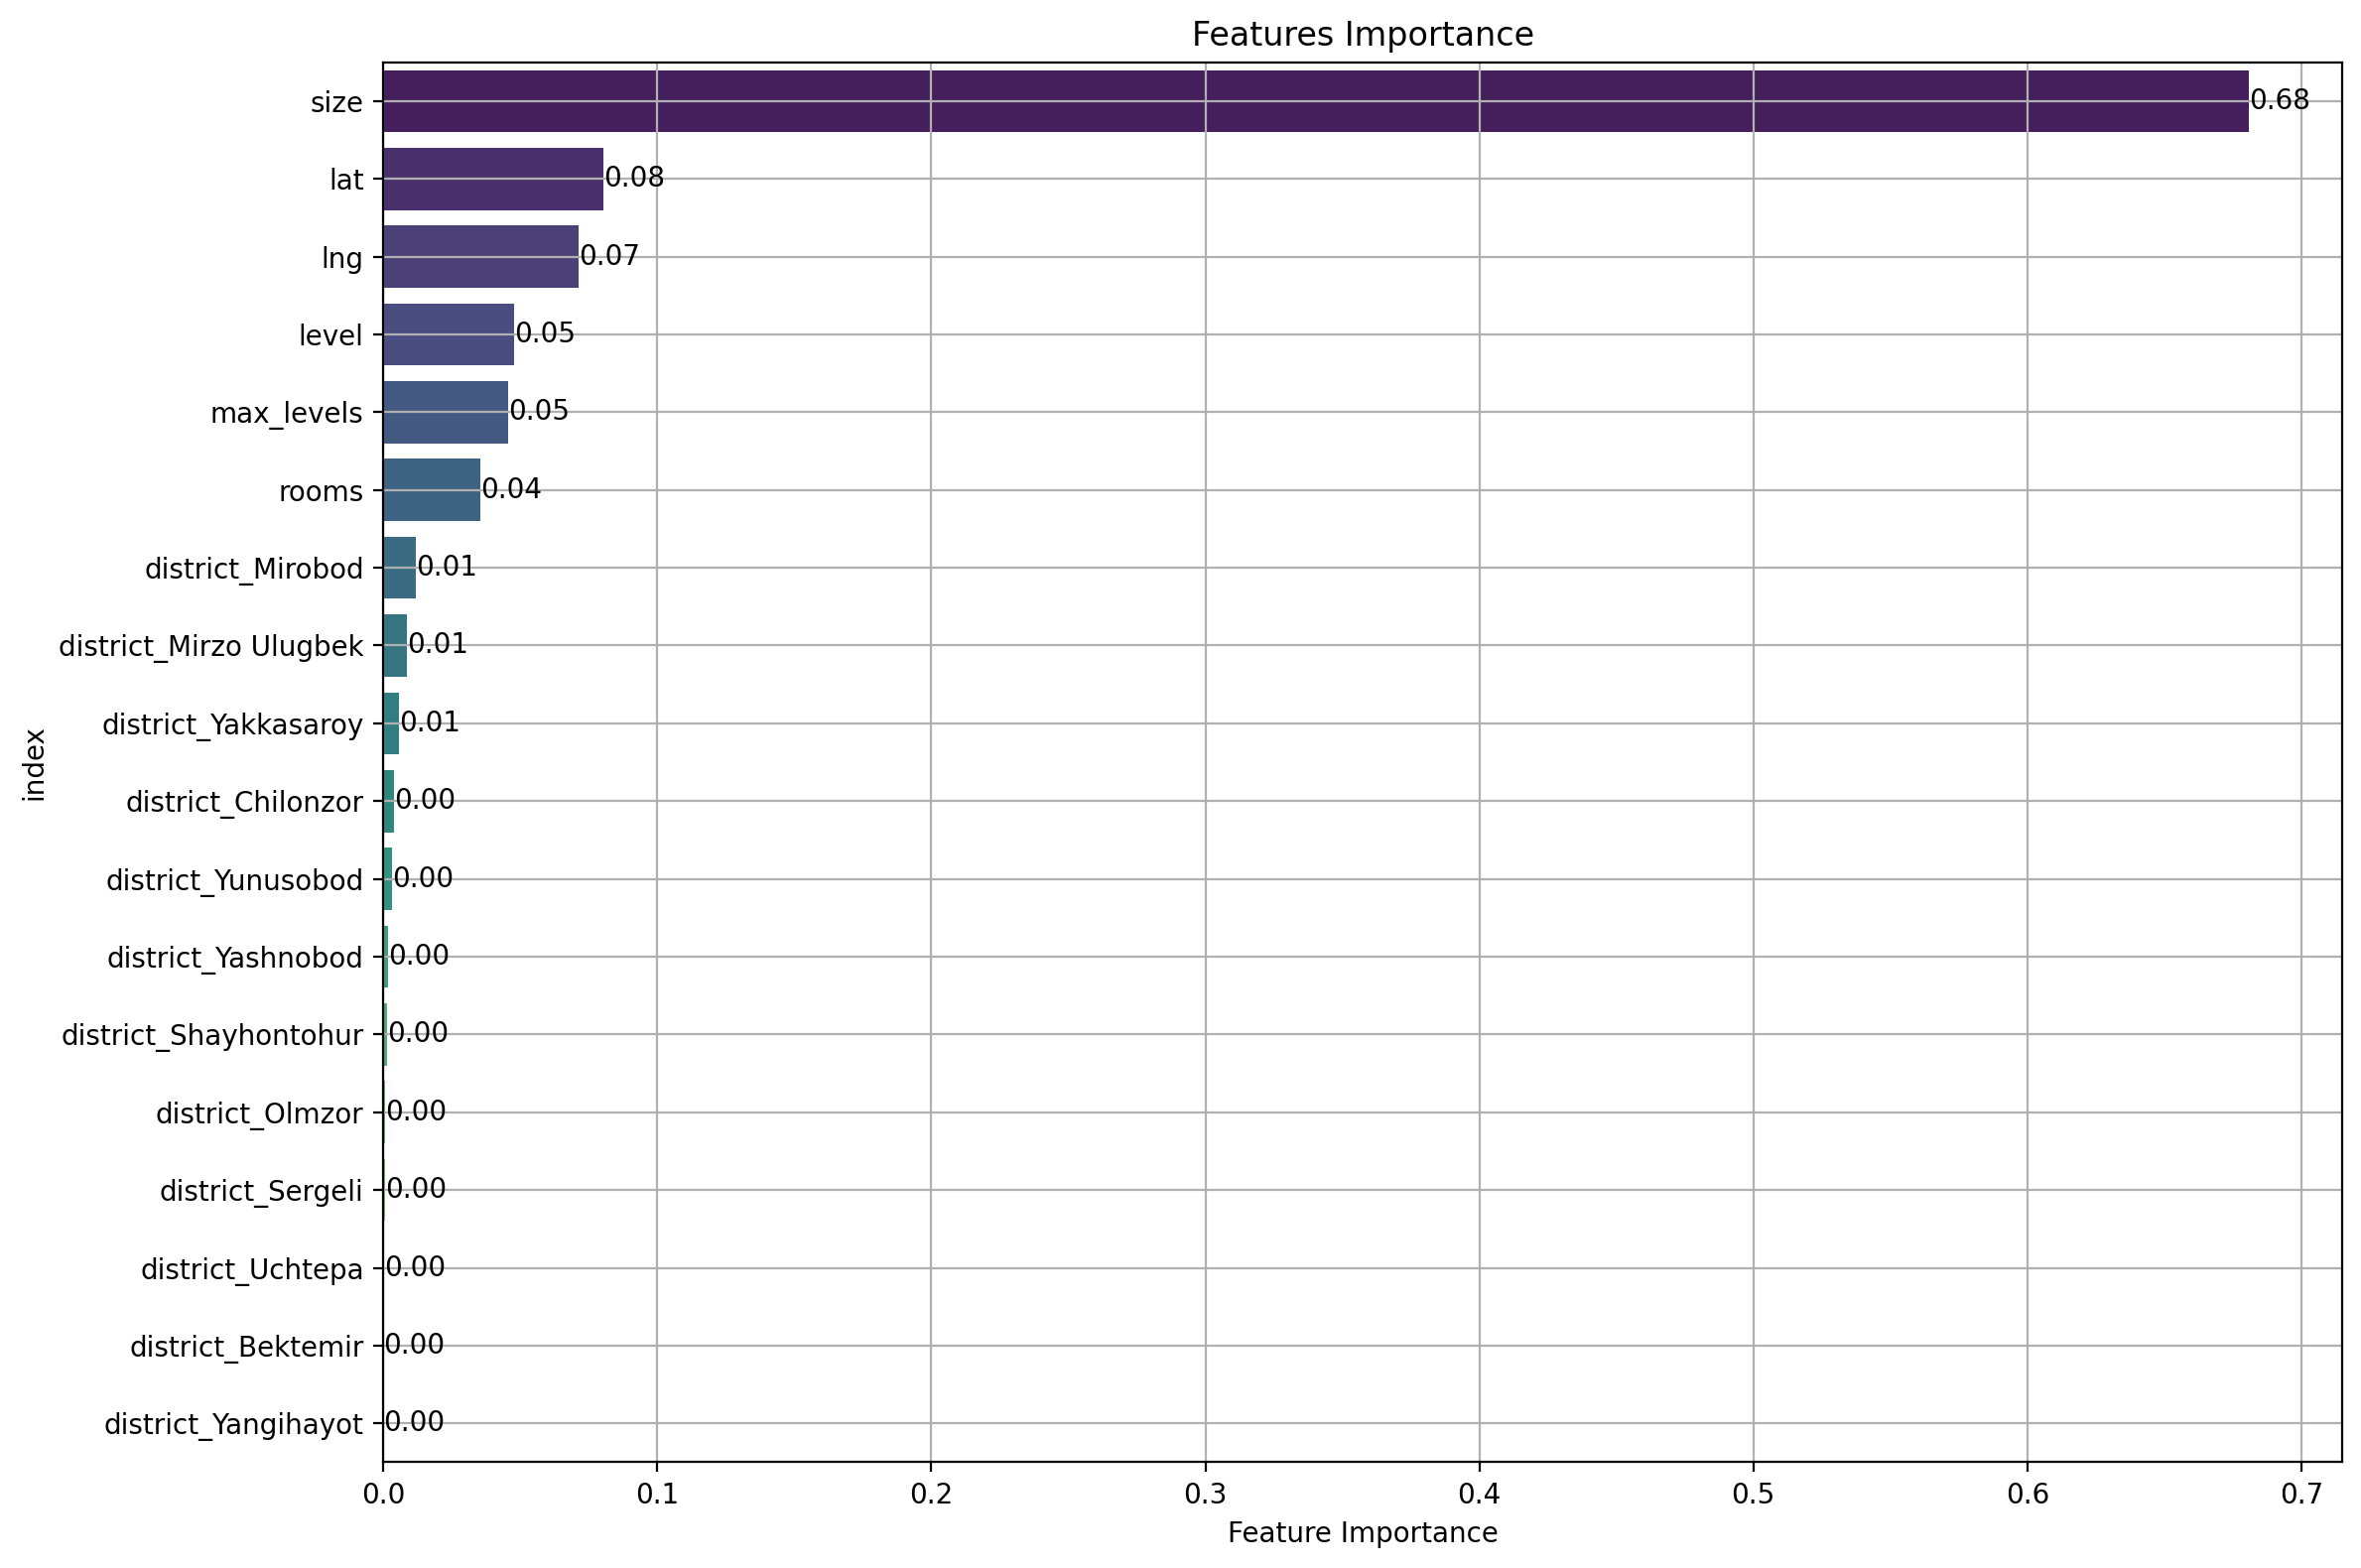

In [31]:
# Create a dataframe of feature importance
feature_importance = pd.DataFrame(data=rf_model.feature_importances_, index=X.columns, columns=["Feature Importance"])
feature_importance = feature_importance.sort_values(by="Feature Importance", ascending=False)
feature_importance.reset_index(inplace=True)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12,8), dpi=200)
ax = sns.barplot(data=feature_importance, x="Feature Importance", y="index", palette="viridis")
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f", label_type="edge")
plt.grid(True)
plt.title("Features Importance")
plt.tight_layout()
plt.show()